<a href="https://colab.research.google.com/github/SiddharthSinghKushwaha/Indian-Sign-Language-Recognition/blob/main/Build_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
!unzip /content/drive/MyDrive/ISLD_small_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: ISLD_small_data/Q/0.jpg  
  inflating: ISLD_small_data/Q/1.jpg  
  inflating: ISLD_small_data/Q/10.jpg  
  inflating: ISLD_small_data/Q/100.jpg  
  inflating: ISLD_small_data/Q/101.jpg  
  inflating: ISLD_small_data/Q/102.jpg  
  inflating: ISLD_small_data/Q/103.jpg  
  inflating: ISLD_small_data/Q/104.jpg  
  inflating: ISLD_small_data/Q/105.jpg  
  inflating: ISLD_small_data/Q/106.jpg  
  inflating: ISLD_small_data/Q/107.jpg  
  inflating: ISLD_small_data/Q/108.jpg  
  inflating: ISLD_small_data/Q/109.jpg  
  inflating: ISLD_small_data/Q/11.jpg  
  inflating: ISLD_small_data/Q/110.jpg  
  inflating: ISLD_small_data/Q/111.jpg  
  inflating: ISLD_small_data/Q/112.jpg  
  inflating: ISLD_small_data/Q/113.jpg  
  inflating: ISLD_small_data/Q/114.jpg  
  inflating: ISLD_small_data/Q/115.jpg  
  inflating: ISLD_small_data/Q/116.jpg  
  inflating: ISLD_small_data/Q/117.jpg  
  inflating: ISLD_small_data/Q/118.jpg  
  inflating:

Found 17500 images belonging to 35 classes.


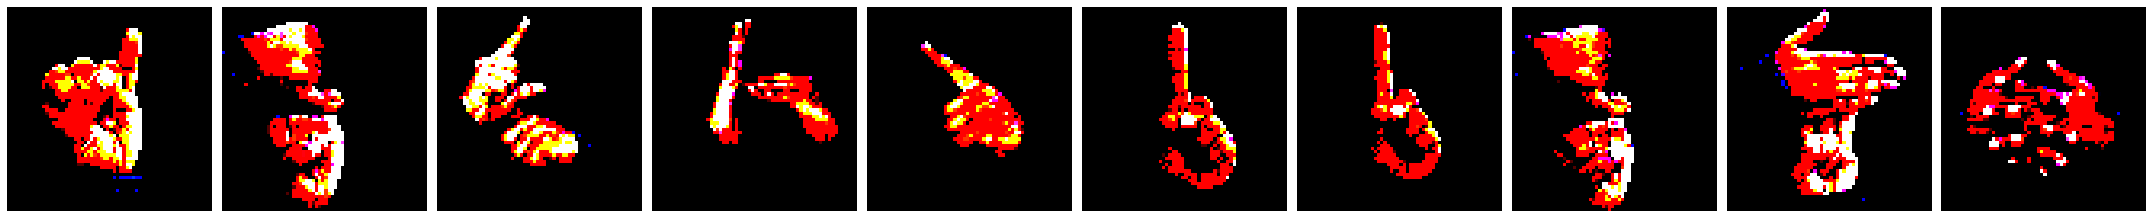

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
train_path = r'ISLD_small_data'
#test_path = r'test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
#test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

imgs, labels = next(train_batches)


#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(10,activation ="softmax"))


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


In [ ]:
model.save('indian_sign_lang_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [ ]:
import os

loc1 = 'train/1'
loc2 = 'train/2'
loc3 = 'train/3'
loc4 = 'train/4'
loc5 = 'train/5'
loc6 = 'train/6'
loc7 = 'train/7'
loc8 = 'train/8'
loc9 = 'train/9'

In [ ]:
import cv2
from tqdm import tqdm

features = []

for img in tqdm(os.listdir(loc1)):
    f = cv2.imread(os.path.join(loc1,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)        #convert colored images into grayscale format
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in tqdm(os.listdir(loc2)):
    f = cv2.imread(os.path.join(loc1,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)        #convert colored images into grayscale format
    f = cv2.resize(f , (50,50))
    features.append(f)

for img in tqdm(os.listdir(loc3)):
    f = cv2.imread(os.path.join(loc3,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in tqdm(os.listdir(loc4)):
    f = cv2.imread(os.path.join(loc4,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in tqdm(os.listdir(loc5)):
    f = cv2.imread(os.path.join(loc5,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)        #convert colored images into grayscale format
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in tqdm(os.listdir(loc6)):
    f = cv2.imread(os.path.join(loc6,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in tqdm(os.listdir(loc7)):
    f = cv2.imread(os.path.join(loc7,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in tqdm(os.listdir(loc8)):
    f = cv2.imread(os.path.join(loc8,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f , (50,50))
    features.append(f)
    
for img in tqdm(os.listdir(loc9)):
    f = cv2.imread(os.path.join(loc9,img))
    f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)        #convert colored images into grayscale format
    f = cv2.resize(f , (50,50))
    features.append(f)

100%|██████████| 56/56 [00:00<00:00, 1680.25it/s]


In [ ]:
labels = []

for img in tqdm(os.listdir(loc1)):
    labels.append(1)
    
for img in tqdm(os.listdir(loc2)):
    labels.append(2)
    
for img in tqdm(os.listdir(loc3)):
    labels.append(3)
    
for img in tqdm(os.listdir(loc4)):
    labels.append(4)
    
for img in tqdm(os.listdir(loc5)):
    labels.append(5)
    
for img in tqdm(os.listdir(loc6)):
    labels.append(6)
    
for img in tqdm(os.listdir(loc7)):
    labels.append(7)
    
for img in tqdm(os.listdir(loc8)):
    labels.append(8)
    
for img in tqdm(os.listdir(loc9)):
    labels.append(9)

100%|██████████| 56/56 [00:00<00:00, 390167.81it/s]


In [ ]:
import numpy as np

X = np.array(features)
print(X.shape)

Y = np.array(labels)
print(Y.shape)

(504, 50, 50)
(504,)


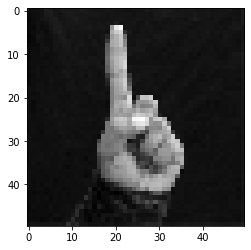

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[102] , cmap='gray')
plt.show()

In [ ]:
import keras
from keras.utils import np_utils

X = X.reshape(504,2500)
X = np_utils.normalize(X)

Y = np_utils.to_categorical(Y)

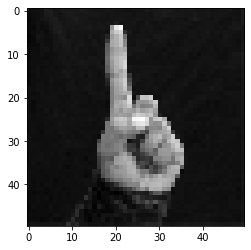

In [ ]:
plt.imshow(X[102].reshape(50,50) , cmap='gray')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [ ]:
from keras import models
from keras import layers
model2 = models.Sequential()

model2.add(layers.Dense(64 , activation='relu' , input_dim=2500))
model2.add(layers.Dense(32 , activation='relu'))
model2.add(layers.Dense(12 , activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 128)       

In [ ]:
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer='sgd' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.save('model1.h5')